### Lunar Starship analysis!

In [1]:
import numpy as np
import matplotlib.pyplot as plt

$\Delta v_T=\Delta v$ from start to end,

$\Delta v_F=\Delta v$ from end to start,

$P=$ Lunar Starship propellant capacity,

$m_F=$ payload (in metric tons) from end to start,

$m_T=$ payload (in metric tons) to end from start,

$M=$ dry mass of lunar Starship; ranges b/w 80T & 120T inclusive :) 

$v_e=$ SpaceX's Raptor Vacuum engine (RVac) exhaust velocity $=I_{sp}g=$ 3724 m/s,

$T=\frac{\Delta v_T}{v_e}$

$F=\frac{\Delta v_F}{v_e}$

$\phi=1-e^T$

$\lambda=e^T(e^F-1)$

$k=\frac{\phi}{\lambda}$

$c=\frac{P}{\lambda}+M(k-1)$

and the relation between $m_F$ and $m_T$ is $m_F=km_T+c$

In [2]:
TO = "Moon"
FROM = "GTO"
VEHICLE = "Lunar Starship"
P = 1200
ve = 3724 
vT = 3200
vF = 3200
T = vT / ve
F = vF / ve
phi = 1 - np.exp(T)
lda = np.exp(T) * (np.exp(F) - 1)
k = phi / lda
mT = np.arange(700)
c = lambda M, P: P / lda + M * (k - 1) 
mF = lambda M, P: k * mT + c(M, P)

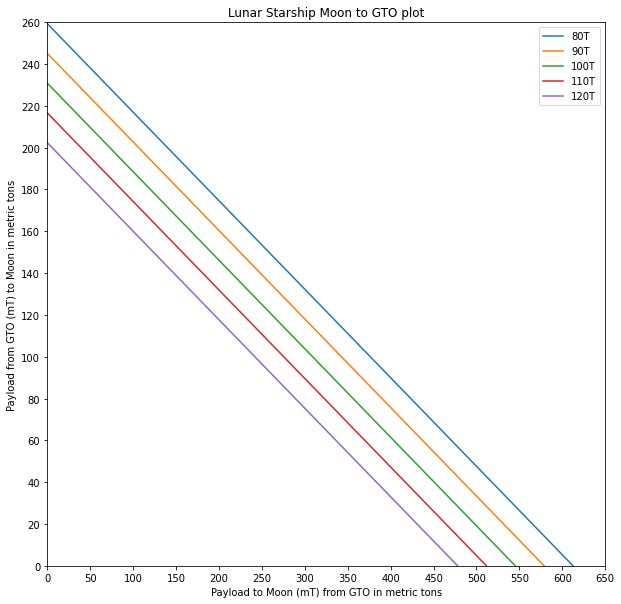

In [3]:
fig = plt.figure(figsize=(10, 10))
plt.title(f"{VEHICLE} {TO} to {FROM} plot")
plt.xlabel(f"Payload to {TO} (mT) from {FROM} in metric tons")
plt.ylabel(f"Payload from {FROM} (mT) to {TO} in metric tons")
plt.xticks(np.arange(0, 700, 50))
plt.yticks(np.arange(0, 280, 20))
plt.xlim(0, 650)
plt.ylim(0, 260)
for M in range(80, 130, 10):
    plot = plt.plot(mT, mF(M, P), label=f"{M}T")
plt.legend(loc="upper right")
plt.show()

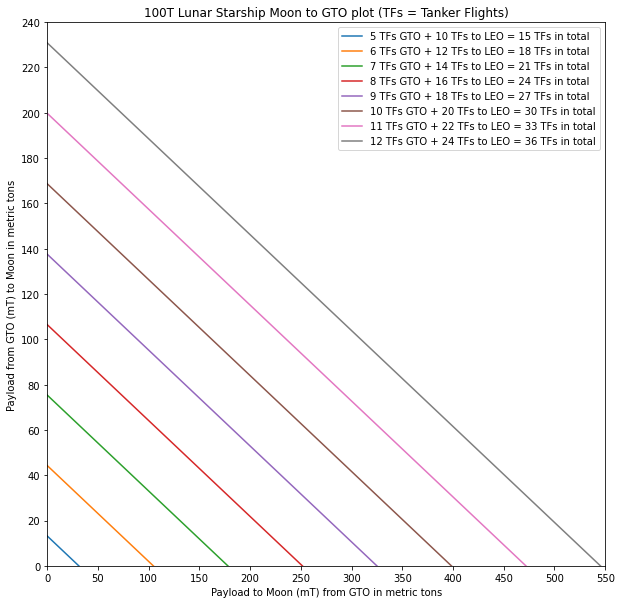

In [6]:
fig = plt.figure(figsize=(10, 10))
plt.title(f"100T {VEHICLE} {TO} to {FROM} plot (TFs = Tanker Flights)")
plt.xlabel(f"Payload to {TO} (mT) from {FROM} in metric tons")
plt.ylabel(f"Payload from {FROM} (mT) to {TO} in metric tons")
plt.xticks(np.arange(0, 600, 50))
plt.yticks(np.arange(0, 260, 20))
plt.xlim(0, 550)
plt.ylim(0, 240)
for n in range(5, 13):
    plot = plt.plot(mT, mF(100, n * 100), label=f"{n} TFs {FROM} + {2 * n} TFs to LEO = {3 * n} TFs in total")
plt.legend(loc="upper right")
plt.show()